In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
pd.read_csv("Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\1325944443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


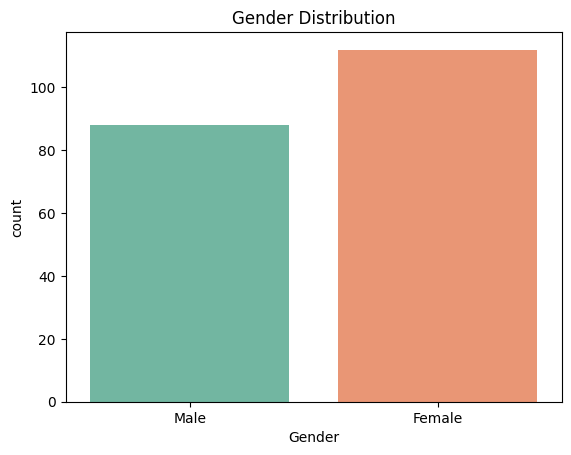

In [5]:
# Gender distribution
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

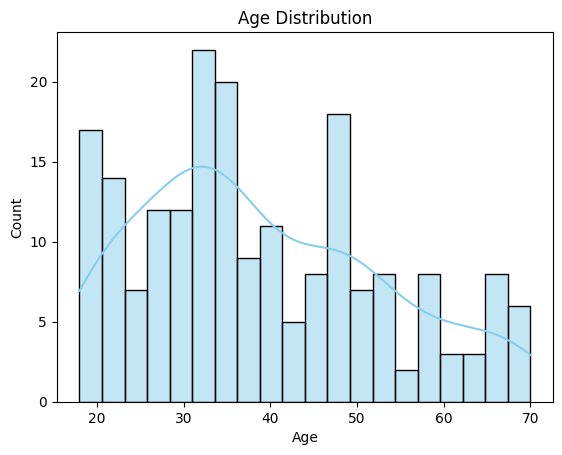

In [6]:
# Age distribution
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.show()

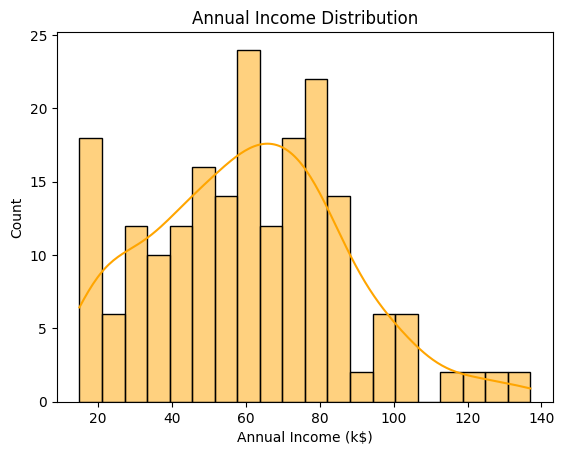

In [7]:
# Annual Income distribution
sns.histplot(df["Annual Income (k$)"], kde=True, bins=20, color="orange")
plt.title("Annual Income Distribution")
plt.show()

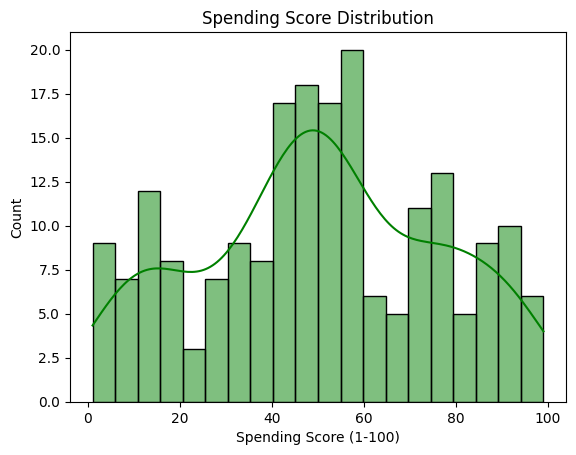

In [8]:
# Spending Score distribution
sns.histplot(df["Spending Score (1-100)"], kde=True, bins=20, color="green")
plt.title("Spending Score Distribution")
plt.show()

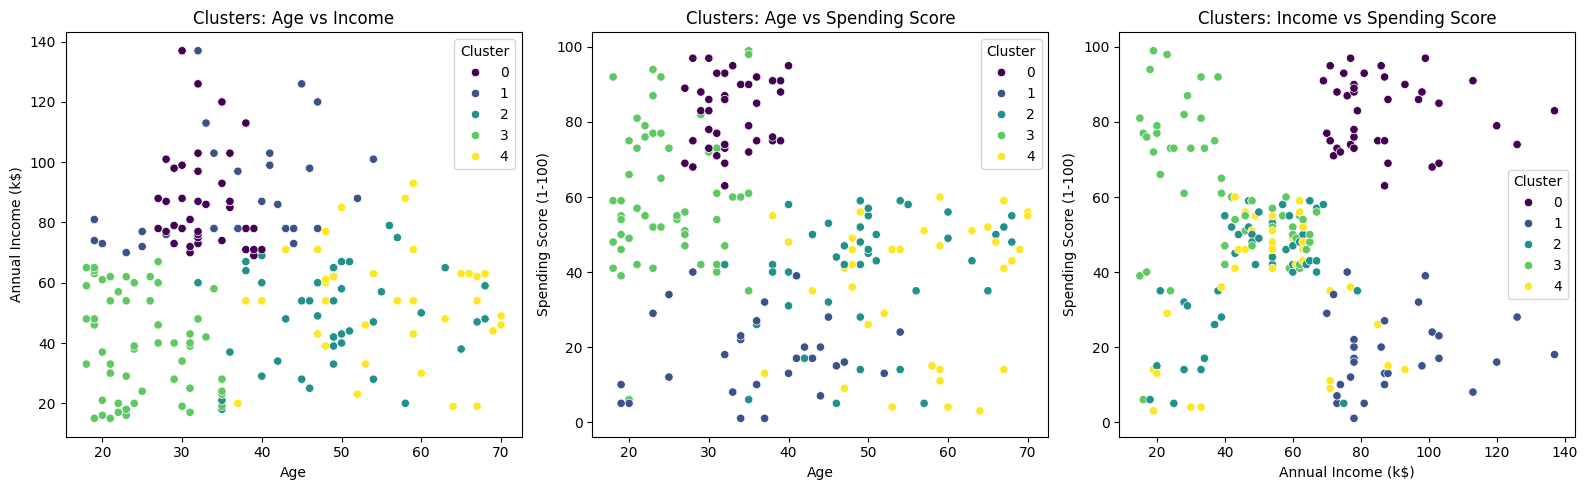

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# Age vs Income
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Cluster", palette="viridis")
plt.title("Clusters: Age vs Income")

# Age vs Spending
plt.subplot(1,3,2)
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
plt.title("Clusters: Age vs Spending Score")

# Income vs Spending
plt.subplot(1,3,3)
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
plt.title("Clusters: Income vs Spending Score")

plt.tight_layout()
plt.show()


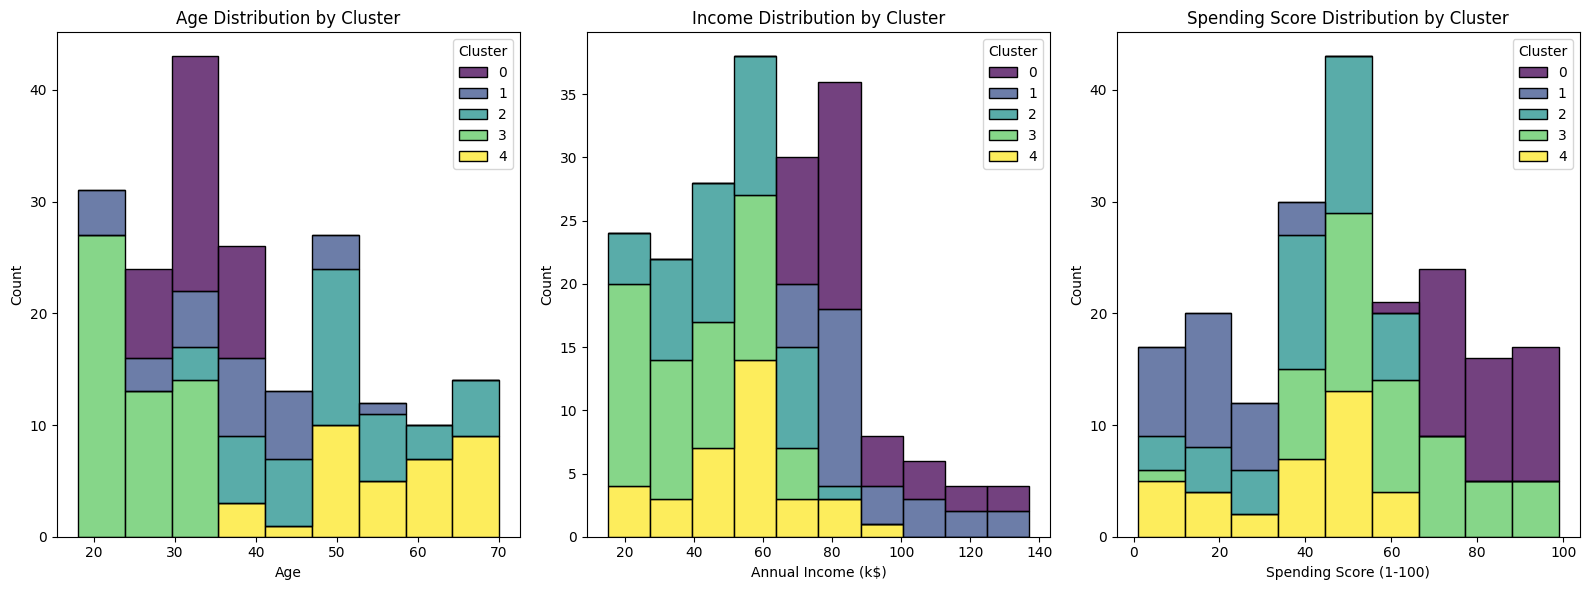

In [60]:
plt.figure(figsize=(16,6))

# Age Distribution
plt.subplot(1,3,1)
sns.histplot(data=df, x="Age", hue="Cluster", multiple="stack", palette="viridis")
plt.title("Age Distribution by Cluster")

# Income Distribution
plt.subplot(1,3,2)
sns.histplot(data=df, x="Annual Income (k$)", hue="Cluster", multiple="stack", palette="viridis")
plt.title("Income Distribution by Cluster")

# Spending Score Distribution
plt.subplot(1,3,3)
sns.histplot(data=df, x="Spending Score (1-100)", hue="Cluster", multiple="stack", palette="viridis")
plt.title("Spending Score Distribution by Cluster")

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\3841566115.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




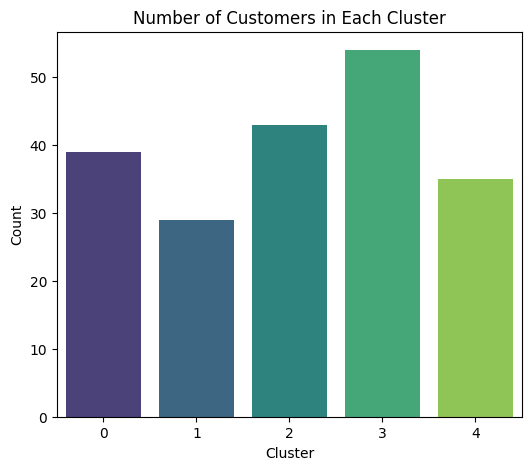

In [61]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


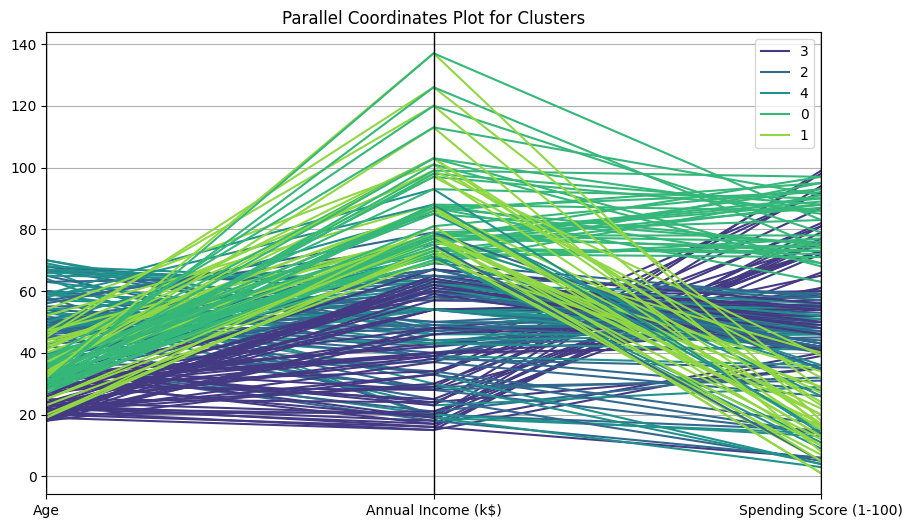

In [63]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,6))
parallel_coordinates(df[["Age","Annual Income (k$)","Spending Score (1-100)","Cluster"]], 
                     "Cluster", color=sns.color_palette("viridis", df["Cluster"].nunique()))
plt.title("Parallel Coordinates Plot for Clusters")
plt.show()


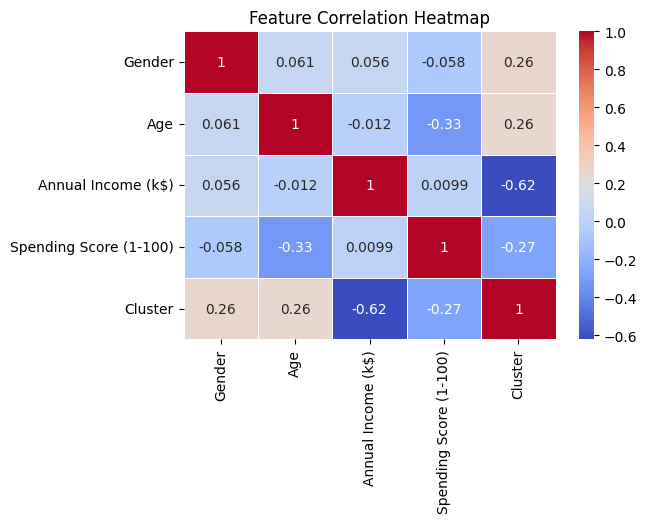

In [18]:

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.drop("CustomerID", axis=1).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\4003897957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="Set2")


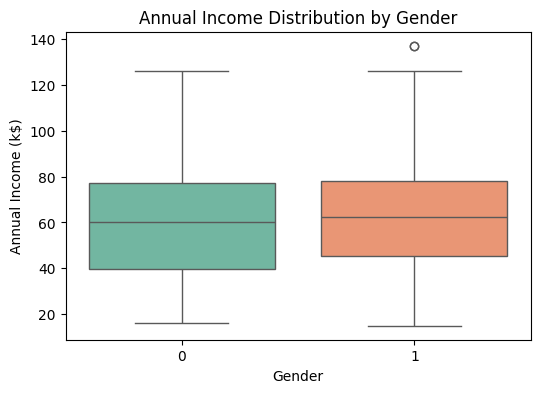

In [19]:
# Gender-wise Income & Spending
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="Set2")
plt.title("Annual Income Distribution by Gender")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\1653717163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="Set3")


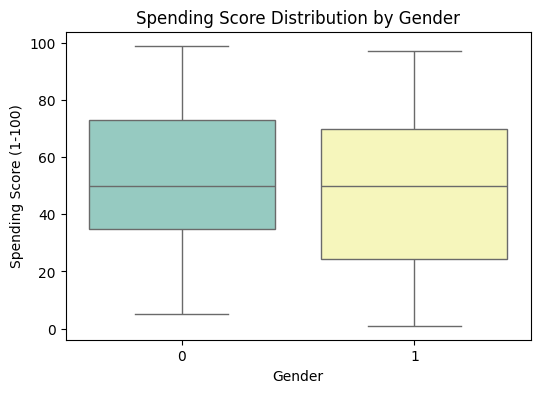

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="Set3")
plt.title("Spending Score Distribution by Gender")
plt.show()

In [21]:
# Age Group Analysis
bins = [18, 25, 35, 45, 55, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\452071686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=df, palette="Pastel1")


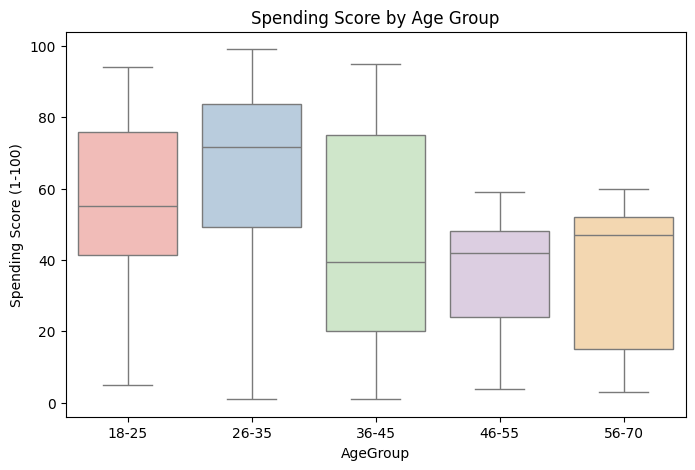

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=df, palette="Pastel1")
plt.title("Spending Score by Age Group")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\735762675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeGroup", y="Annual Income (k$)", data=df, palette="Pastel2")


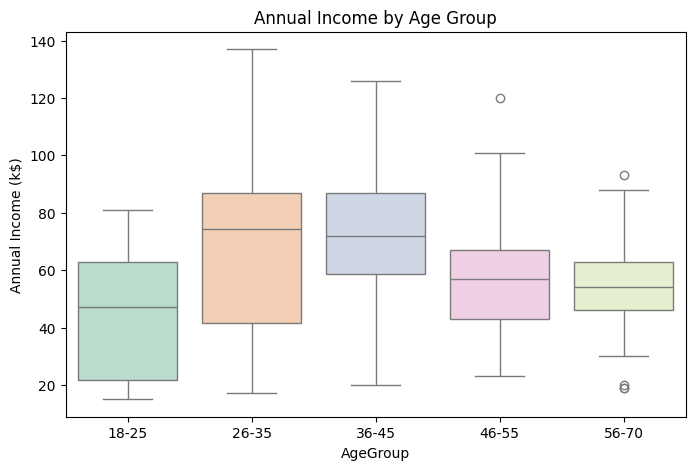

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x="AgeGroup", y="Annual Income (k$)", data=df, palette="Pastel2")
plt.title("Annual Income by Age Group")
plt.show()

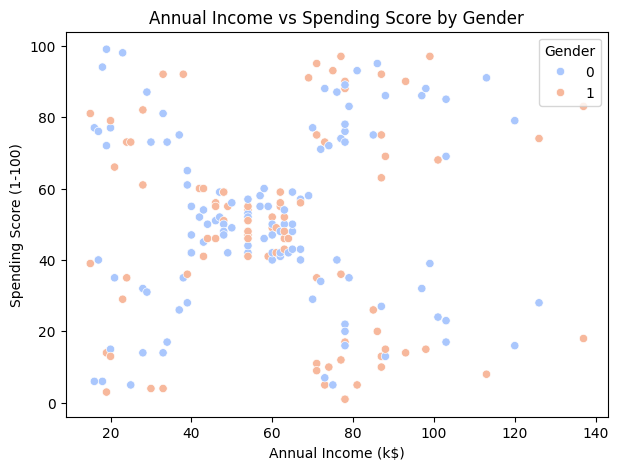

In [24]:
# Income vs Spending
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Gender", palette="coolwarm")
plt.title("Annual Income vs Spending Score by Gender")
plt.show()

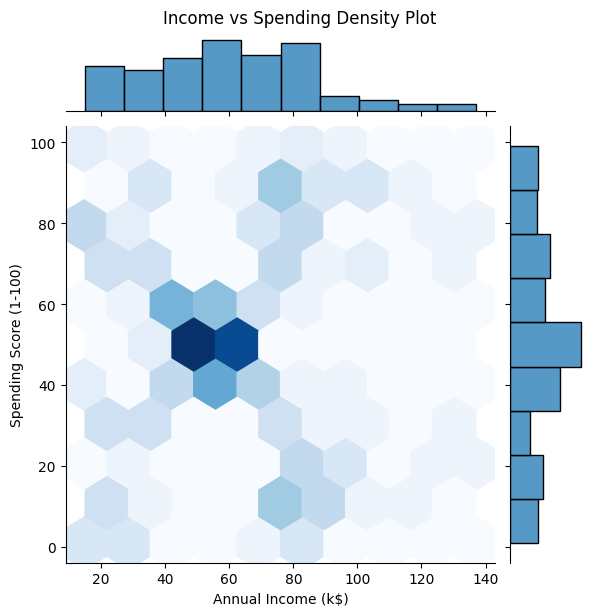

In [25]:
sns.jointplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, kind="hex", cmap="Blues")
plt.suptitle("Income vs Spending Density Plot", y=1.02)
plt.show()

In [26]:
# Cluster Profiling
cluster_profile = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Profile (mean values):\n", cluster_profile)


Cluster Profile (mean values):
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        36.482759           89.517241               18.000000
2        49.813953           49.232558               40.069767
3        24.907407           39.722222               61.203704
4        55.714286           53.685714               36.771429


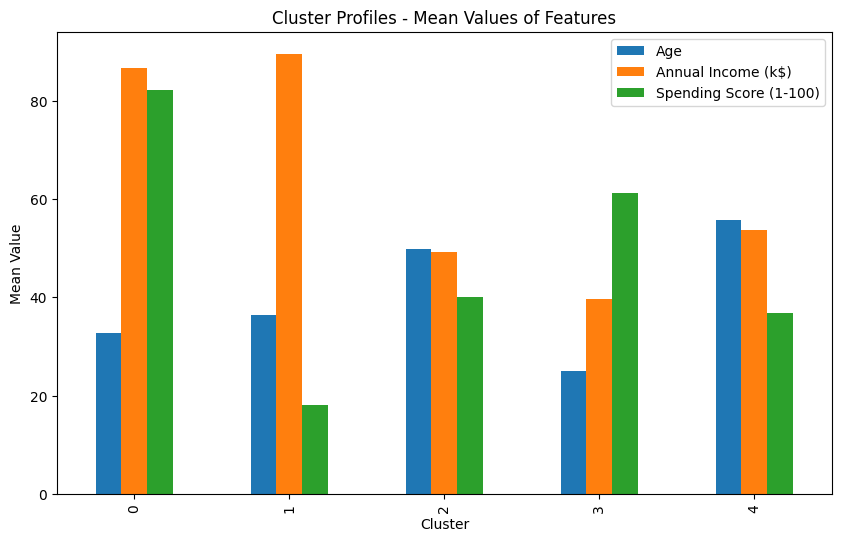

In [27]:
cluster_profile.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles - Mean Values of Features")
plt.ylabel("Mean Value")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\2871602354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="Set1")


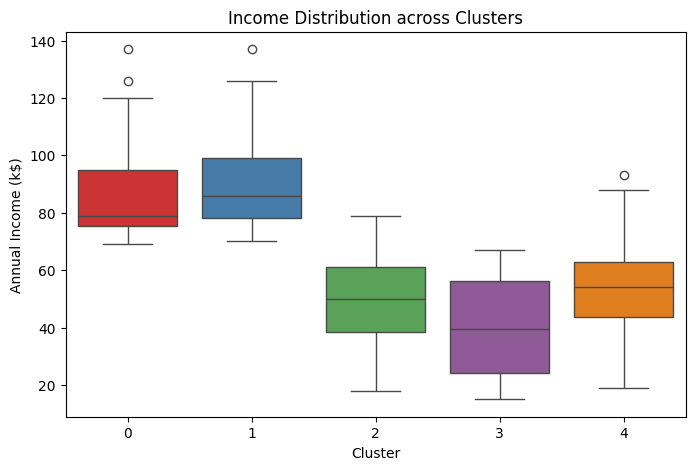

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="Set1")
plt.title("Income Distribution across Clusters")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\3050114475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="Set2")


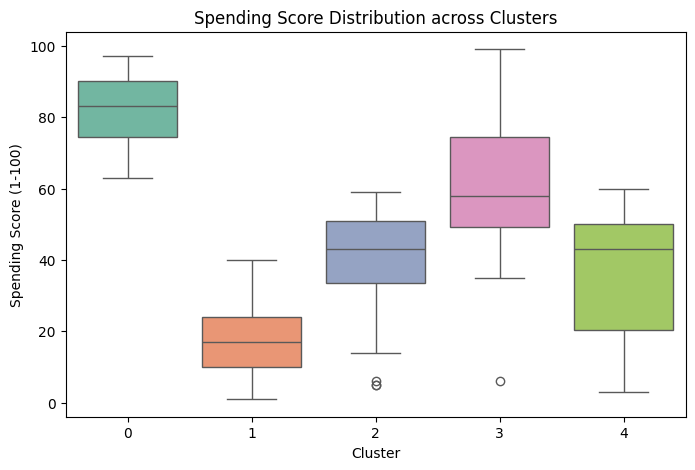

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="Set2")
plt.title("Spending Score Distribution across Clusters")
plt.show()

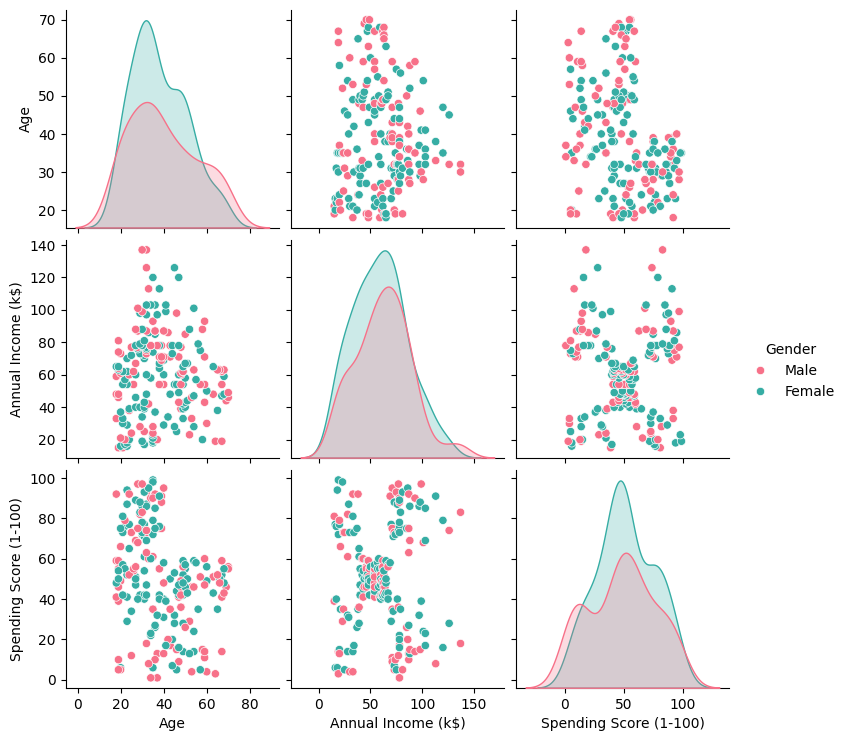

In [9]:
# Pairplot for visualization
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender", palette="husl")
plt.show()

In [10]:
#  Data Preprocessing

# Encode Gender
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])  # Male=1, Female=0

# Features for clustering
X = df.drop("CustomerID", axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

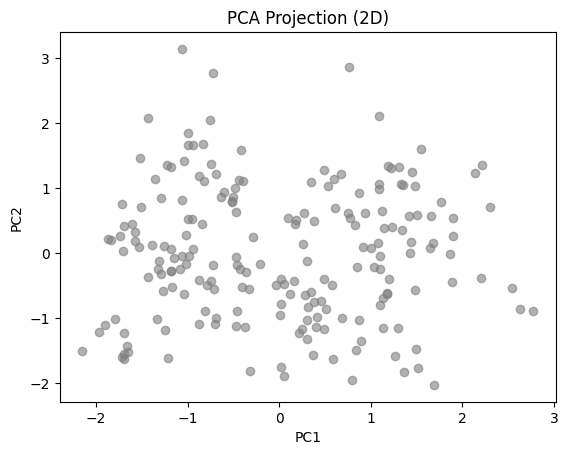

In [11]:
# Optional PCA (for visualization in 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", alpha=0.6)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

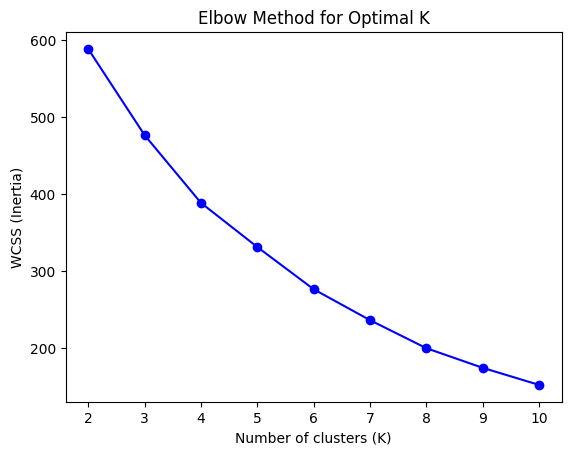

In [12]:
# -------------------------------
# 3. KMeans and Elbow Method
# -------------------------------
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, wcss, "bo-")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [13]:
# -------------------------------
# 4. Fit Optimal KMeans (choose K=5 for Mall Customers)
# -------------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

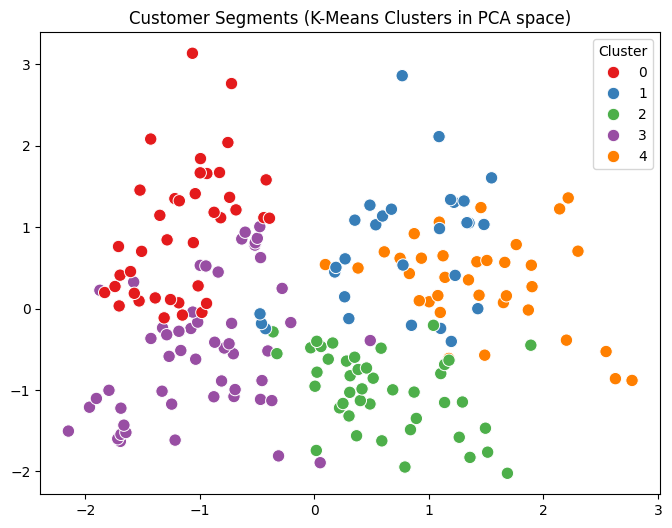

In [14]:
# -------------------------------
# 5. Cluster Visualization
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1", s=80)
plt.title("Customer Segments (K-Means Clusters in PCA space)")
plt.show()

In [15]:
# -------------------------------
# 6. Silhouette Score
# -------------------------------
score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.3040600988258827



Cluster Profile (mean values):
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        36.482759           89.517241               18.000000
2        49.813953           49.232558               40.069767
3        24.907407           39.722222               61.203704
4        55.714286           53.685714               36.771429


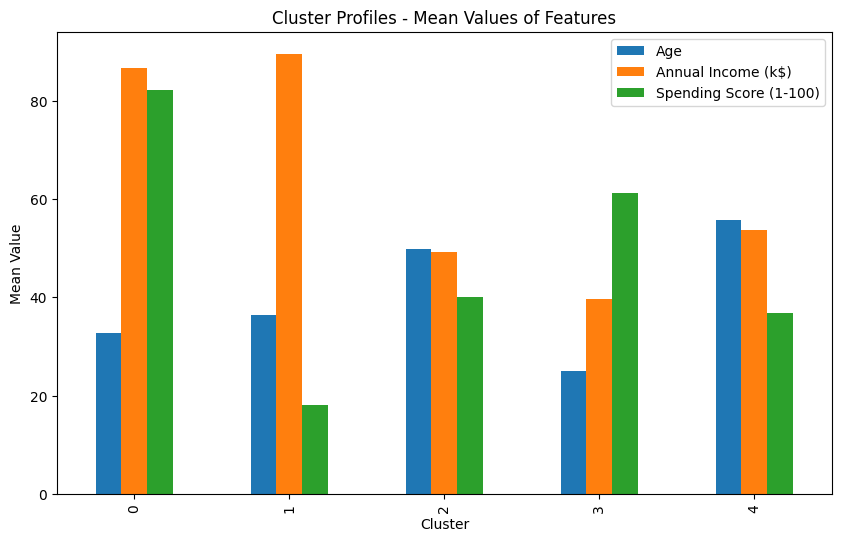

In [33]:
# Cluster Profiling

cluster_profile = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Profile (mean values):\n", cluster_profile)

cluster_profile.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles - Mean Values of Features")
plt.ylabel("Mean Value")
plt.show()

In [31]:

# Automatic Cluster Summary

summary = []
for c in cluster_profile.index:
    age = cluster_profile.loc[c, "Age"]
    income = cluster_profile.loc[c, "Annual Income (k$)"]
    spend = cluster_profile.loc[c, "Spending Score (1-100)"]

    # Categorize income
    if income > 80:
        income_cat = "High Income"
    elif income > 40:
        income_cat = "Medium Income"
    else:
        income_cat = "Low Income"

    # Categorize spending
    if spend > 70:
        spend_cat = "High Spenders"
    elif spend > 40:
        spend_cat = "Moderate Spenders"
    else:
        spend_cat = "Low Spenders"

    # Age group interpretation
    if age < 30:
        age_cat = "Young Customers"
    elif age < 50:
        age_cat = "Middle-aged Customers"
    else:
        age_cat = "Older Customers"

    summary.append(f"Cluster {c}: {income_cat}, {spend_cat}, mostly {age_cat}.")

print("\n===== Cluster Insights Summary =====")
for s in summary:
    print(s)


===== Cluster Insights Summary =====
Cluster 0: High Income, High Spenders, mostly Middle-aged Customers.
Cluster 1: High Income, Low Spenders, mostly Middle-aged Customers.
Cluster 2: Medium Income, Moderate Spenders, mostly Middle-aged Customers.
Cluster 3: Low Income, Moderate Spenders, mostly Young Customers.
Cluster 4: Medium Income, Low Spenders, mostly Older Customers.


In [36]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


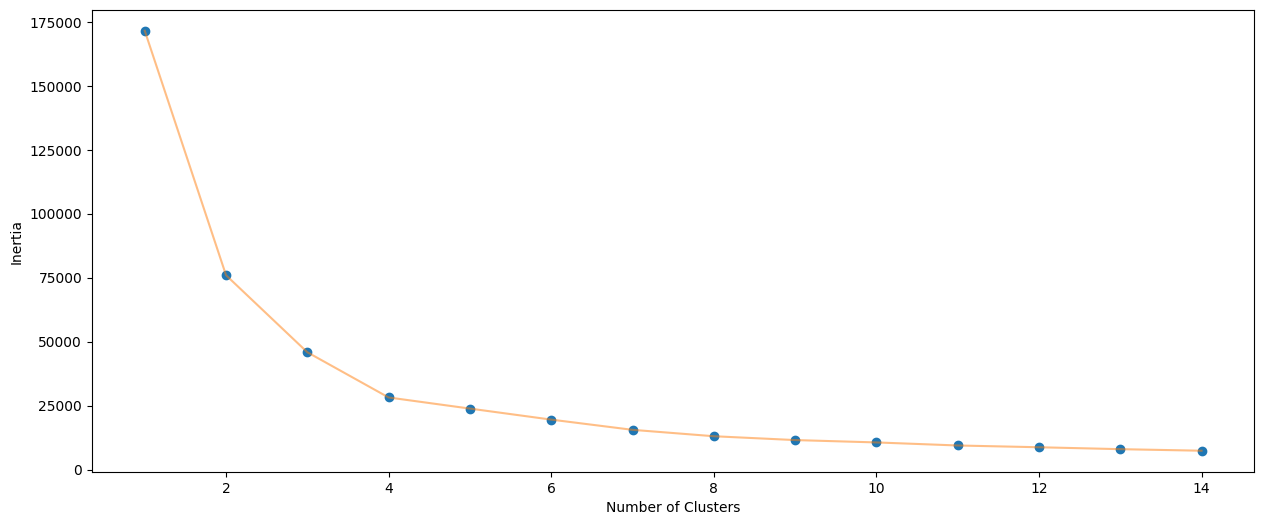

In [37]:
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

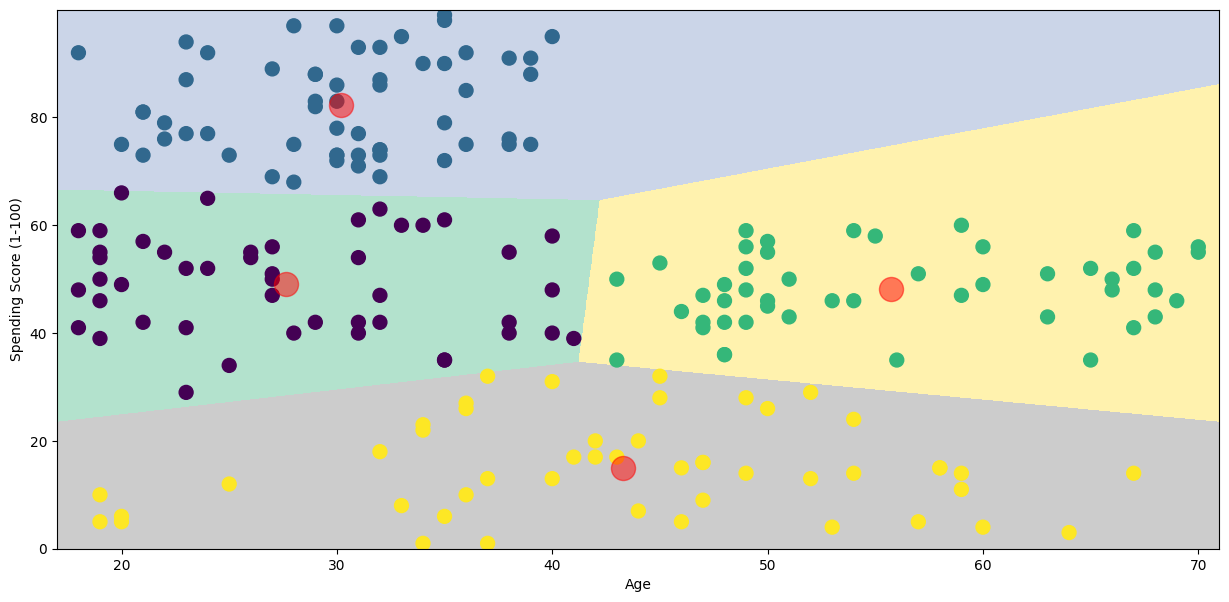

In [39]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [46]:
# Applying KMeans for k=5
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

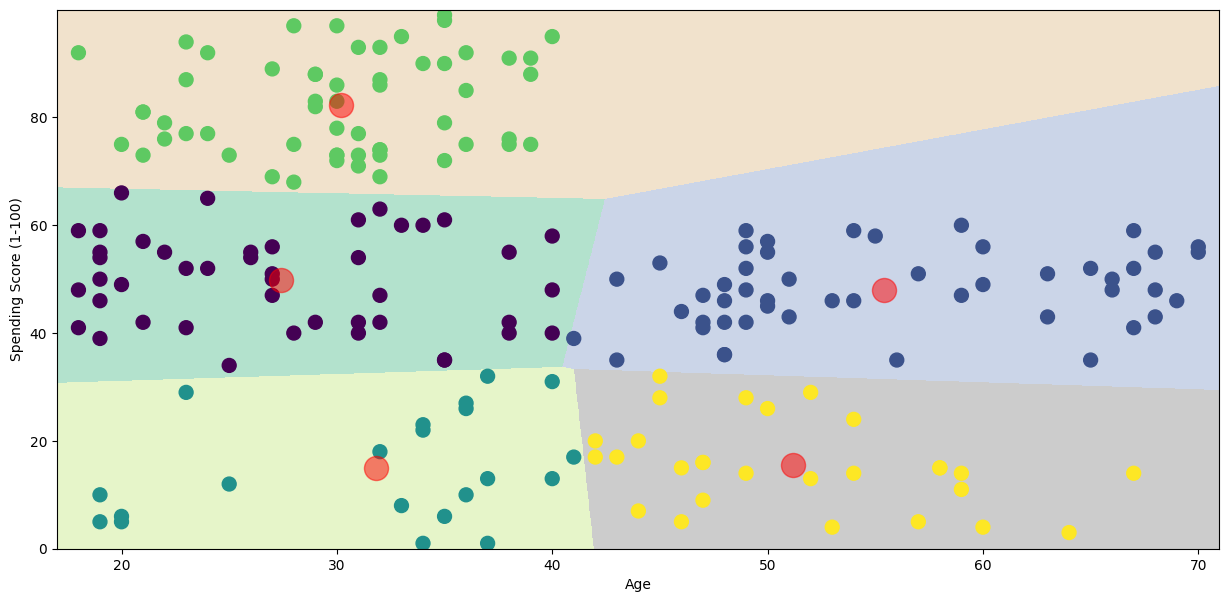

In [47]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



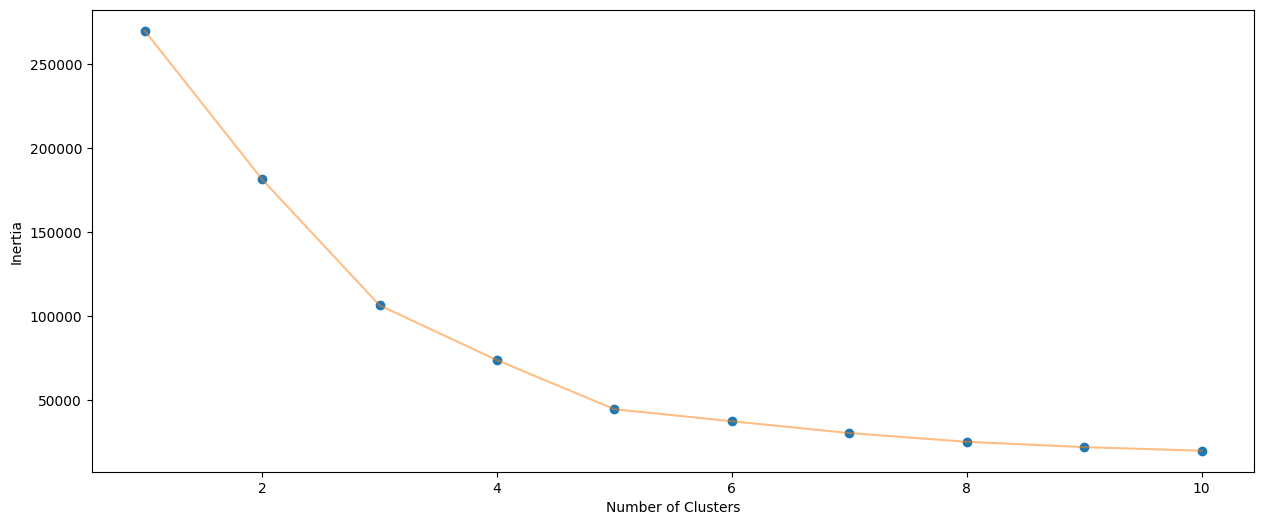

In [48]:
# 2D Clustering based on Annual Income and Spending Score
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [49]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

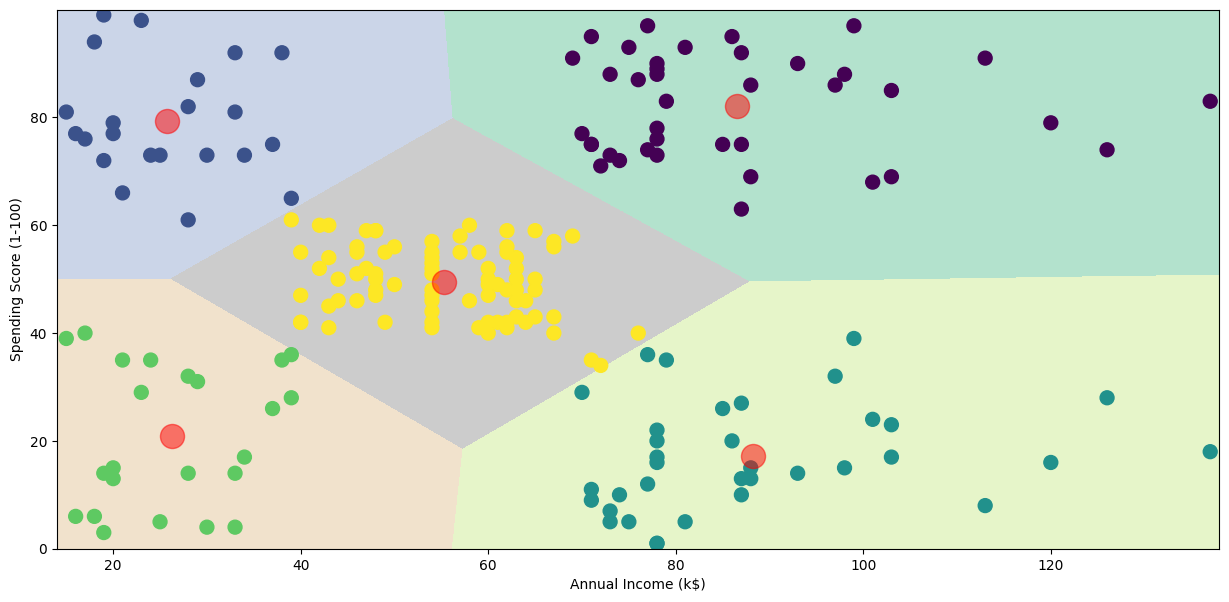

In [50]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



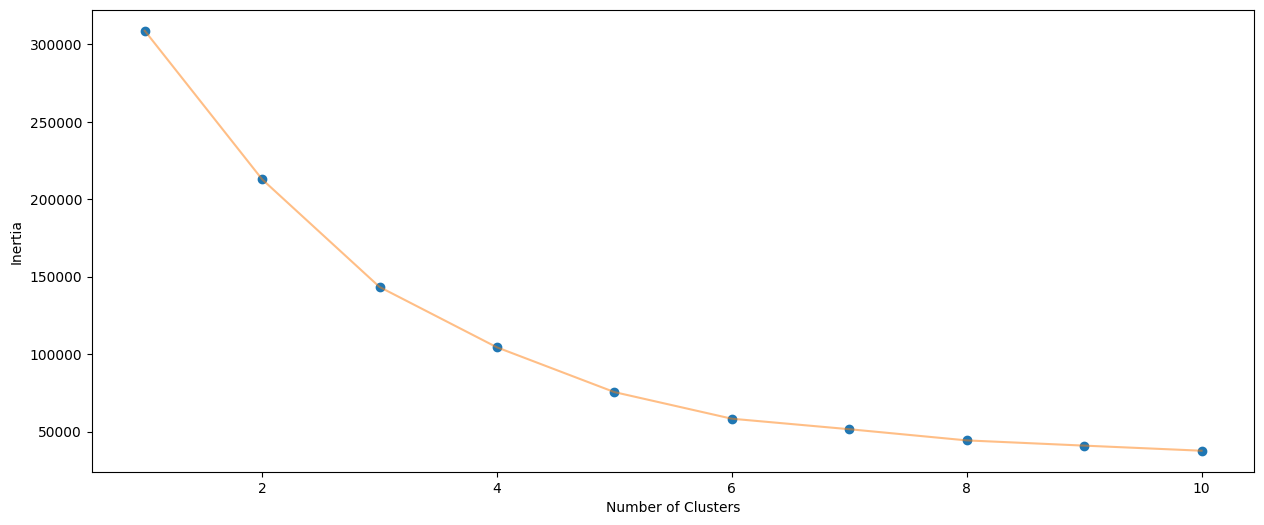

In [51]:
# 3D Clustering Age , Annual Income and Spending Score
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()